In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
from warnings import simplefilter
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
plt.style.use('Solarize_Light2')
simplefilter('ignore')

In [3]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [4]:
dt=sm.datasets.sunspots.load_pandas().data
dt.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [5]:
dt.index=pd.Index(sm.tsa.datetools.dates_from_range("1700","2008"))
dt.index.freq=dt.index.inferred_freq
del dt["YEAR"]
dt.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


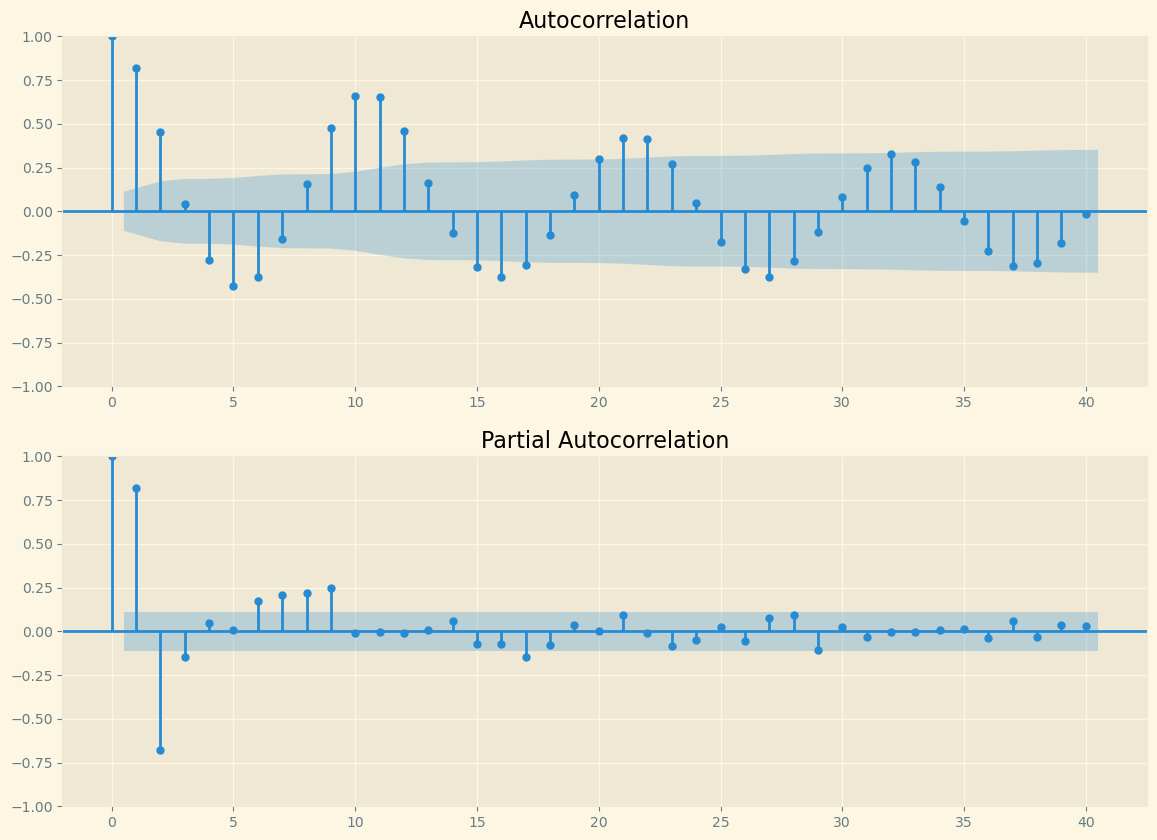

In [6]:
fig=plt.figure(figsize=(14,10))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(dt.values.squeeze(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(dt,lags=40,ax=ax2)

In [7]:
arma_mod20=ARIMA(dt,order=(2,0,0)).fit()
print(arma_mod20.params)

const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727181
dtype: float64


In [8]:
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)

2622.6370933008184 2637.570458408409 2628.6074811460644


In [9]:
arma_mod30=ARIMA(dt,order=(3,0,0)).fit()
print(arma_mod30.params)

const      49.751911
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101140
dtype: float64


In [10]:
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)

2619.4036292456467 2638.0703356301356 2626.866614052204


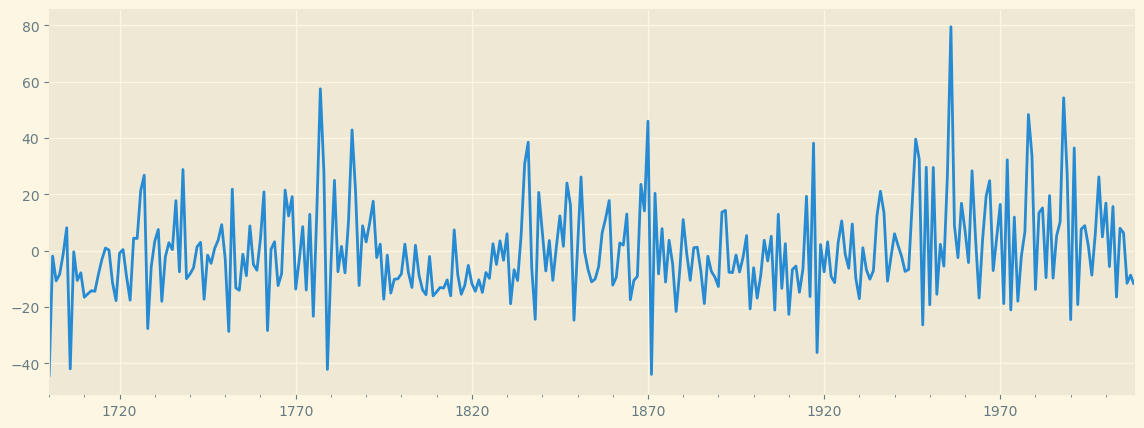

In [11]:
fig=plt.figure(figsize=(14,5))
ax=fig.add_subplot(111)
ax=arma_mod30.resid.plot(ax=ax)

In [12]:
resid=arma_mod30.resid
stats.normaltest(resid)

NormaltestResult(statistic=49.84393222352858, pvalue=1.5015079620686466e-11)

In [13]:
lb_test1 = acorr_ljungbox(resid, lags=[10])
print("Ljung-Box test p-values:", lb_test1)

Ljung-Box test p-values:       lb_stat  lb_pvalue
10  39.320758   0.000022


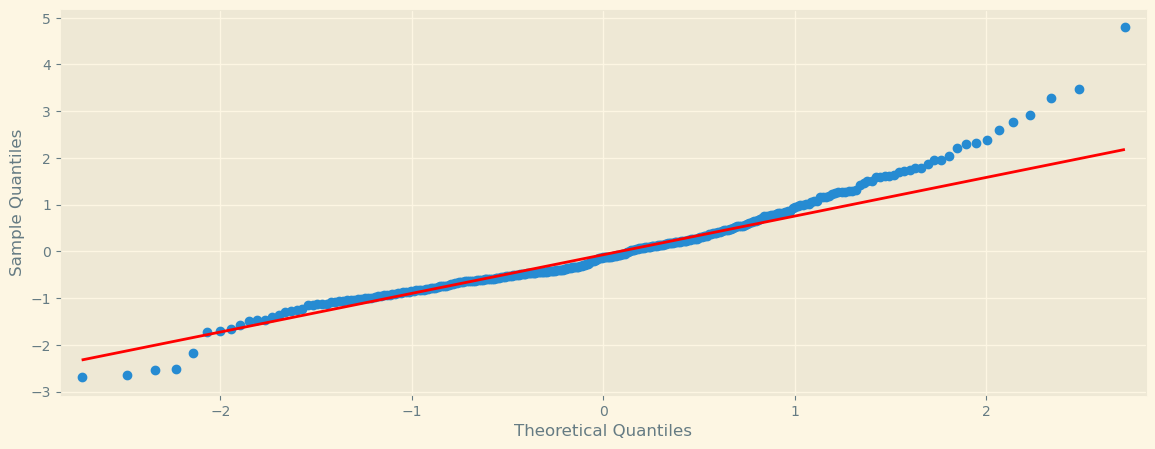

In [14]:
fig=plt.figure(figsize=(14,5))
ax=fig.add_subplot(111)
fig=qqplot(resid,line='q',ax=ax,fit=True)

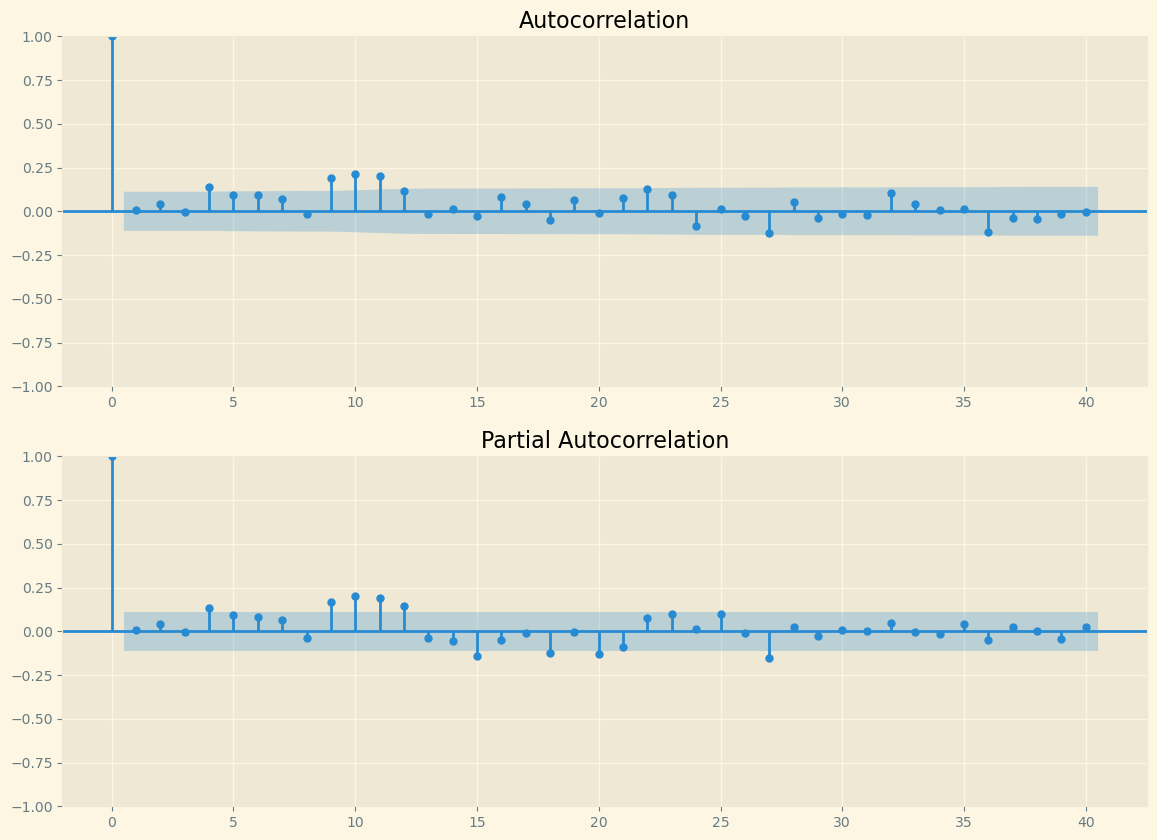

In [15]:
fig=plt.figure(figsize=(14,10))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(resid.values.squeeze(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(resid,lags=40,ax=ax2)

In [16]:
r,q,p=sm.tsa.acf(resid.values.squeeze(),fft=True,qstat=True)
data=np.c_[np.arange(1,41),r[1:],q,p]
table=pd.DataFrame(data,columns=['lags','AC','Q','Prob(>Q)'])
print(table.set_index('lag'))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 40 and the array at index 1 has size 24

In [ ]:
predict_sunspots=arma_mod30.predict('1990','2012',dynamic=True)
print(predict_sunspots)

In [ ]:
def mean_forecast_err(y,yhat):
    return y.sub(yhat).mean()
mean_forecast_err(dt.SUNACTIVITY,predict_sunspots)